In [39]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import torch
import datasets_2D

device = 'cpu'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


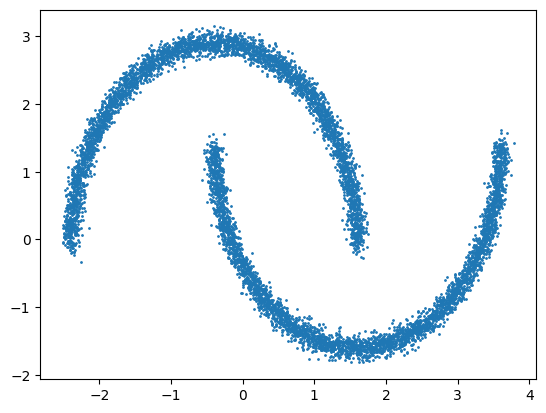

In [40]:
dataset = datasets_2D.get_dataset("moons")

points = dataset.tensors[0]
plt.scatter(points[:, 0], points[:, 1], s=1)

In [41]:
from diffusers import DDIMScheduler
from model import LowDimensionalDiffusionModel

model = LowDimensionalDiffusionModel(in_features=2).to(device)

In [ ]:
from training import train_diffusion_model

scheduler = DDIMScheduler(
    num_train_timesteps=50,
    beta_schedule="linear",
    beta_start=0.0001,
    beta_end=0.02,
    clip_sample=False
)

class TrainingConfig:
    num_epochs = 50
    train_batch_size = 32
    learning_rate = 1e-3

train_cfg = TrainingConfig()

model = train_diffusion_model(model, dataset, scheduler, train_cfg, device)

Epoch 6 | Loss: 0.6859:  14%|█▍        | 7/50 [00:05<00:35,  1.23it/s]

tensor([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
        31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
        13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])


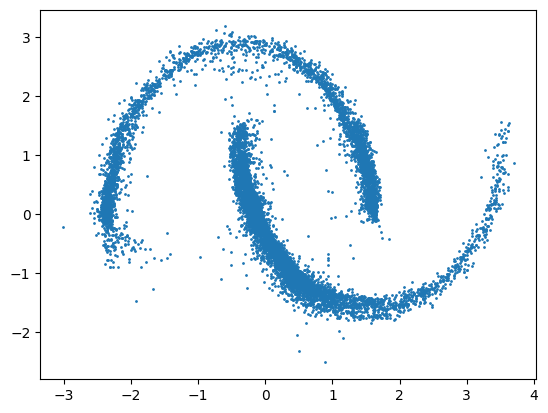

In [38]:
from training import sample_diffusion_model

samples = sample_diffusion_model(
    model, scheduler, (2,), n_samples=10000, n_inference_steps=50
)

samples = samples.cpu().detach().numpy()
plt.scatter(samples[:, 0], samples[:, 1], s=1)